In [1]:
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

# ***`.describe()` ช่วยให้เราเห็นว่า คอลัมน์ไหน ความแปรปรวนเยอะได้ ***

สำหรับตัวแปรเชิงคุณภาพ ให้ใช้

```
.describe(exclude='number')
```

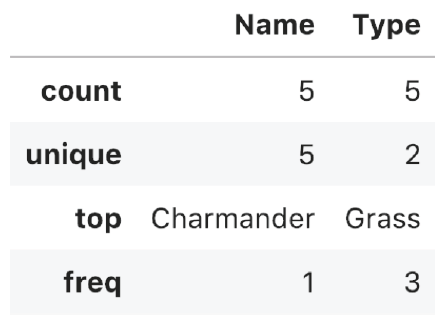

* `2` unique types of Pokemon
* Top occuring type is `Grass`
* `Grass` appears 3 times from total 5 observations.

### ***Removing features without variance***

A sample of the Pokemon dataset has been loaded as `pokemon_df`. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.

* Use the **`.describe()`** method to find the numeric feature without variance and remove its name from the list assigned to `number_cols`.



```
              HP     Attack     Defense  Generation
count  160.00000  160.00000  160.000000       160.0
mean    64.61250   74.98125   70.175000         1.0
std     27.92127   29.18009   28.883533         0.0
min     10.00000    5.00000    5.000000         1.0
25%     45.00000   52.00000   50.000000         1.0
50%     60.00000   71.00000   65.000000         1.0
75%     80.00000   95.00000   85.000000         1.0
max    250.00000  155.00000  180.000000         1.0
```



* Combine the two lists of feature names to sub-select the chosen features from `pokemon_df`.

```
   HP  Attack  Defense                   Name   Type       Legendary
    0  45      49       49              Bulbasaur  Grass      False
    1  60      62       63                Ivysaur  Grass      False
    2  80      82       83               Venusaur  Grass      False
    3  80     100      123  VenusaurMega Venusaur  Grass      False
    4  39      52       43             Charmander   Fire      False
```




* Find the non-numeric feature without variance and remove its name from the list assigned to `non_number_cols`.

In [ ]:
df_selected.describe(exclude='number')



```
          Name   Type Legendary
count      160    160       160
unique     160     15         1
top     Cubone  Water     False
freq         1     31       160
```



In [ ]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())



```
    HP  Attack  Defense                   Name   Type
    0  45      49       49              Bulbasaur  Grass
    1  60      62       63                Ivysaur  Grass
    2  80      82       83               Venusaur  Grass
    3  80     100      123  VenusaurMega Venusaur  Grass
    4  39      52       43             Charmander   Fire
```
All Pokemon in this dataset are non-legendary and from generation one so you could choose to drop those two features.

# ***Building a pairplot***


In [ ]:
sns.pairplot(ansur_df, hue="Gender", diag_kind='hist')

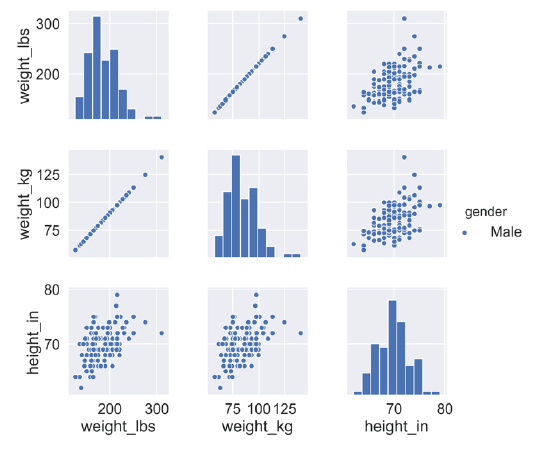

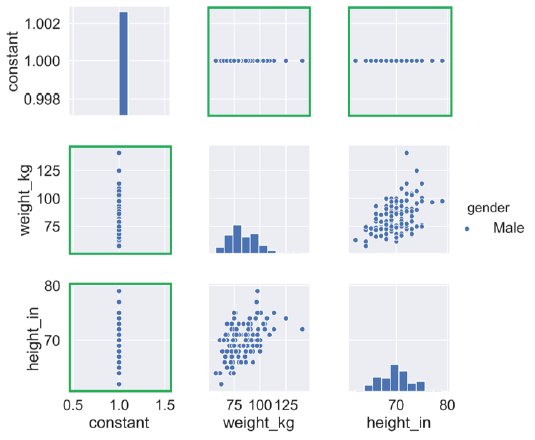

### ***Visually detecting redundant features***

Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

Two data samples have been pre-loaded as `ansur_df_1` and `ansur_df_2`.

* Create a pairplot of the `ansur_df_1` data sample and color the points using the `'Gender'` feature.

In [ ]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

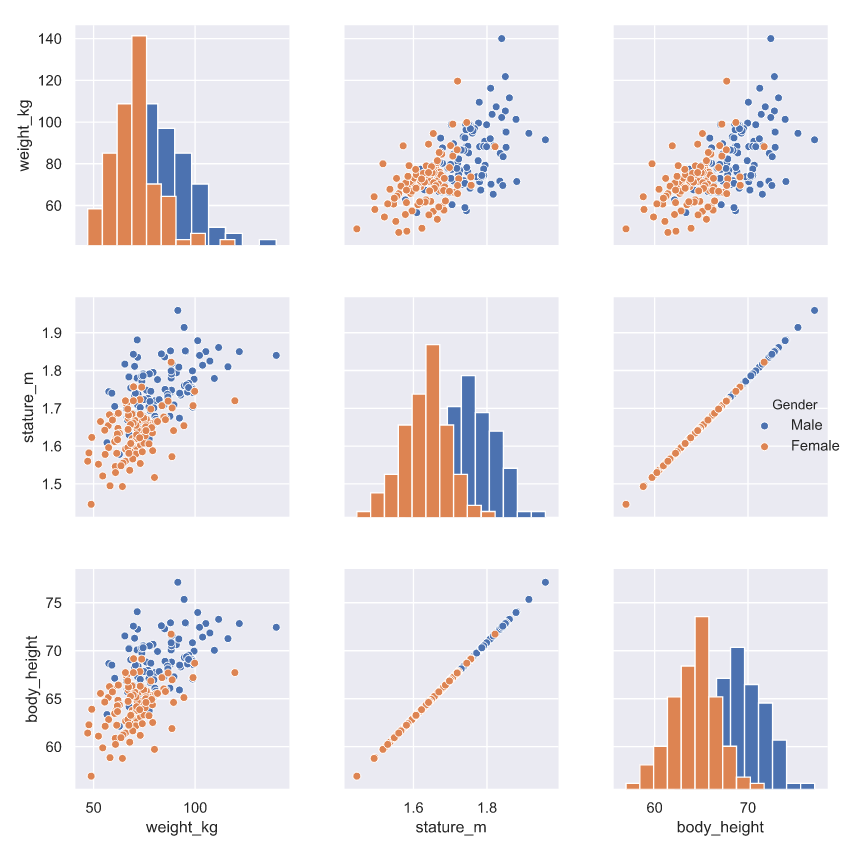

* Two features are basically duplicates, remove one of them from the dataset.

In [ ]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('body_height', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

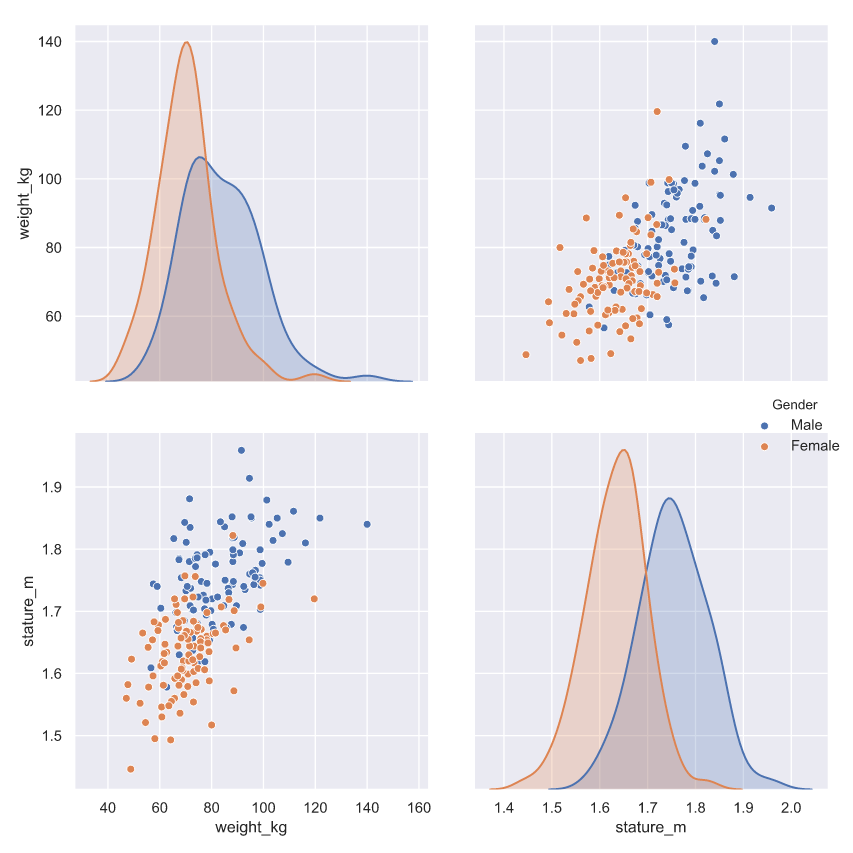

* Now create a pairplot of the `ansur_df_2` data sample and color the points using the '`Gender'` feature.

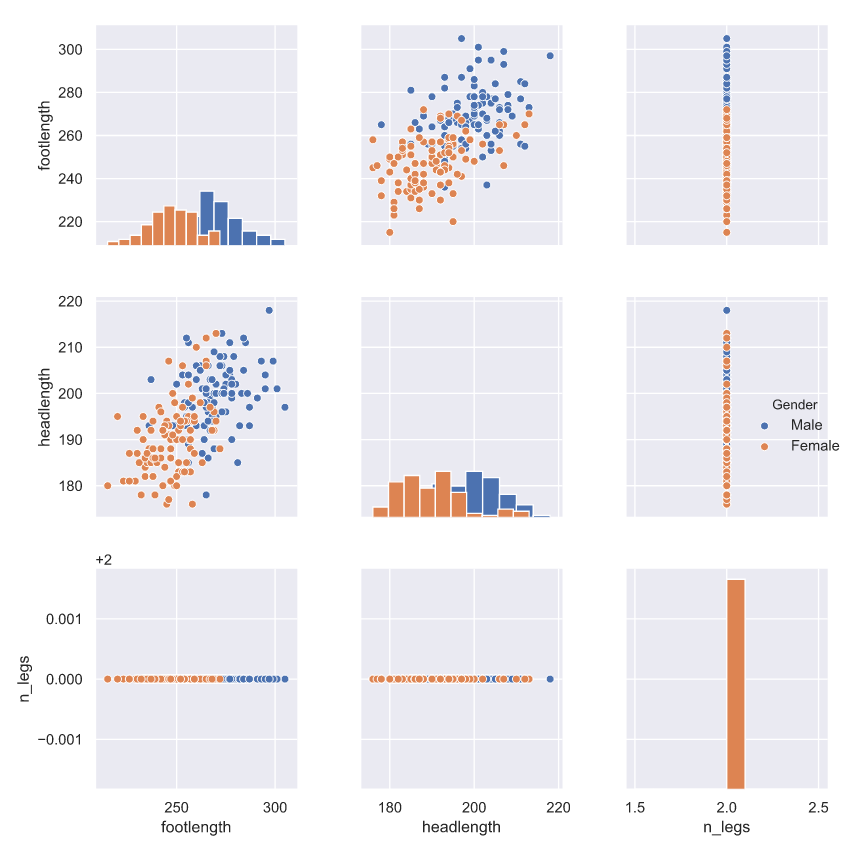

* One feature has no variance, remove it from the dataset.

In [ ]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

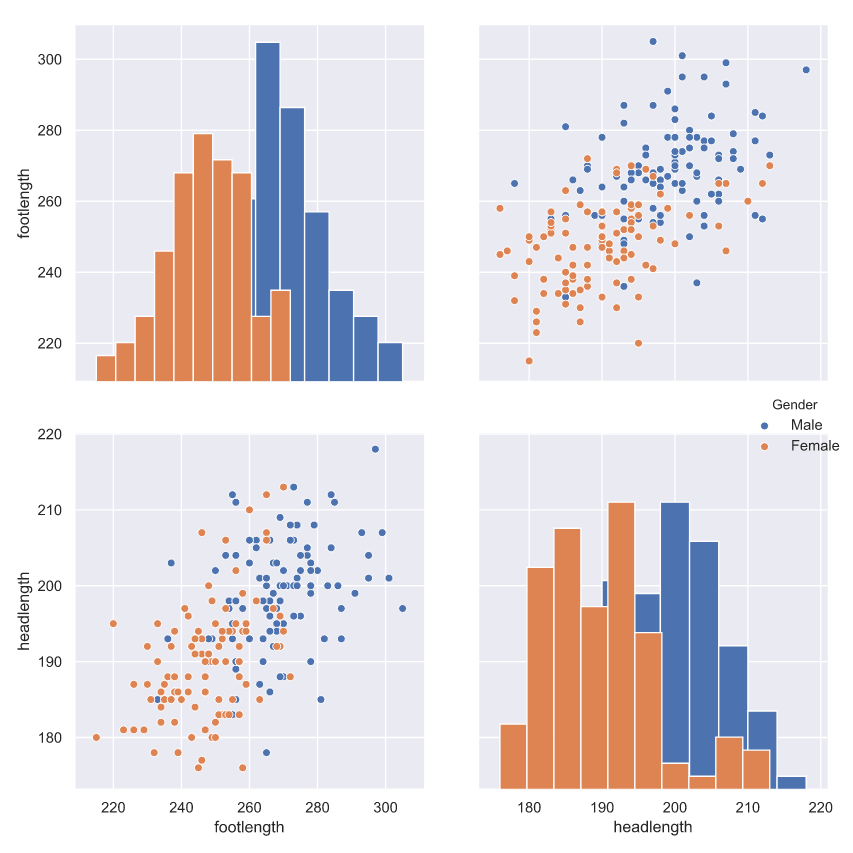

# ***t-SNE visualization of high-dimensional data***

t-SNE reduced the more than 90 features in the dataset to just 2 which you can now plot.



In [ ]:
df = pd.read_csv('ANSUR_II_FEMALE.csv')
df.shape

(1986, 99)

## ***Remove non_numeric data***

In [ ]:
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
df_numeric = df.drop(non_numeric, axis=1)
df_numeric.shape

(1986, 94)

In [ ]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50) # between 10 and 1,000

tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)
tsne_features[1:4,:]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(1986, 2)


array([[-17.2186    ,  31.196482  ],
       [  0.27806804,  31.08053   ],
       [ 22.162998  ,   9.024499  ]], dtype=float32)

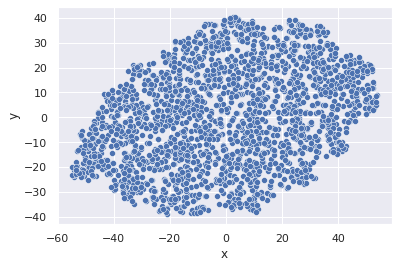

In [ ]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]
sns.scatterplot(x="x", y="y", data=df)
plt.show()

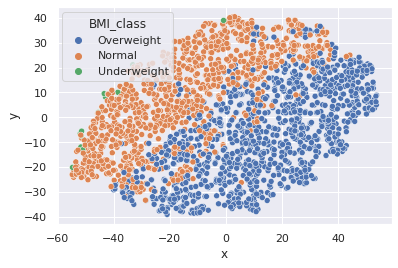

In [ ]:
sns.scatterplot(x="x", y="y", hue='BMI_class', data=df)
plt.show()

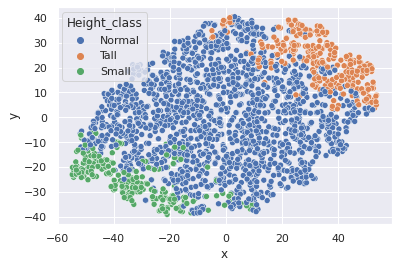

In [ ]:
sns.scatterplot(x="x", y="y", hue='Height_class', data=df)
plt.show()

### ***t-SNE visualisation of dimensionality***

Visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features (`'x'` and `'y'`) which were added to the dataset `df`. In each scatterplot you'll color the points according to a different categorical variable.


* Use seaborn's **`sns.scatterplot`** to create the plot.
* Color the points by `'Component'`.

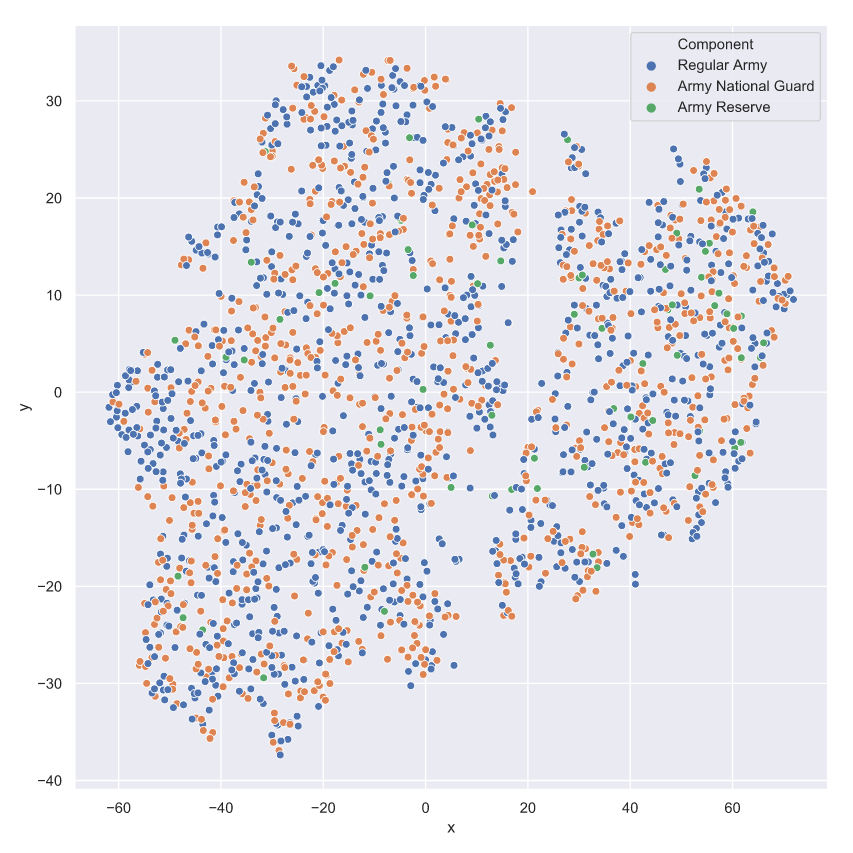

* Color the points of the scatterplot by `'Branch'`.

In [ ]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

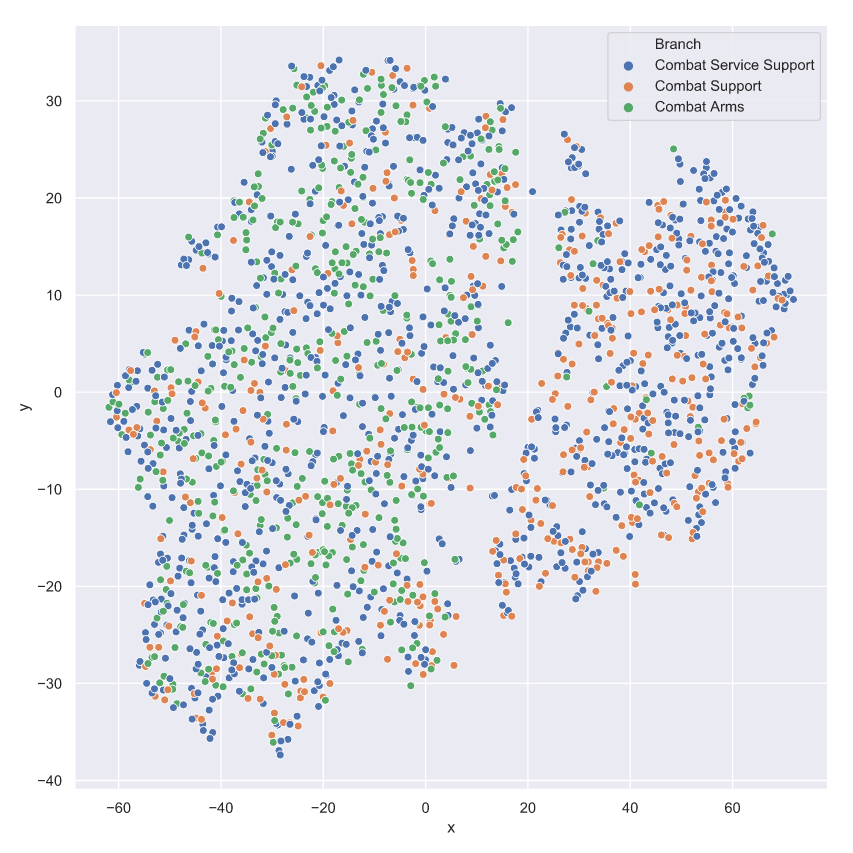

* Color the points of the scatterplot by `'Gender'`

In [ ]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

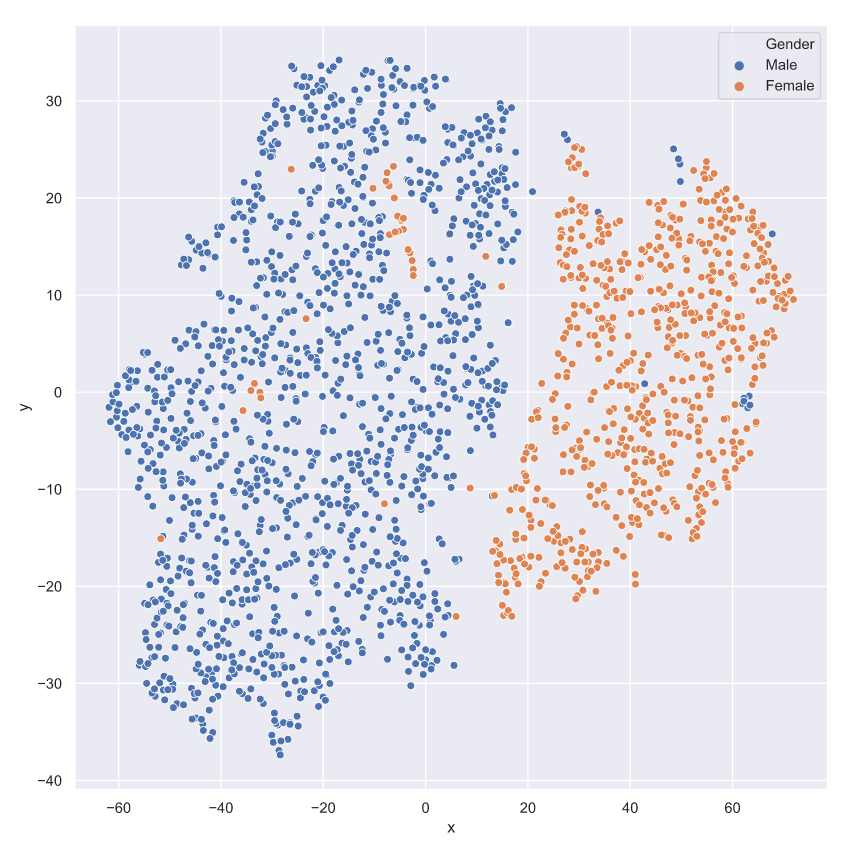




There is a Male and a Female cluster. t-SNE found these gender differences in body shape without being told about them explicitly! From the second plot you learned there are more males in the Combat Arms Branch.

# ***Building a classifier - model fit***

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

# ***Building a  classifier - predict***

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, svc.predict(X_test)))

# ถ้าค่านี้สูงกว่าค่าบนมากไป แปลว่า overfit
print(accuracy_score(y_train, svc.predict(X_train)))

On the full dataset the model is rubbish but with a single feature we can make good predictions? This is an example of the curse of dimensionality! 

# ***Creating a feature selector***



In [ ]:
from sklearn.feature_selection import VarianceThreshold

df1, df2 = pd.read_csv('ANSUR_II_MALE.csv'), pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df1, df2]).drop(columns=['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch'])
print(ansur_df.shape)

(6068, 94)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=1) #variance of one
sel.fit(ansur_df)

mask = sel.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


# ***Applying a feature selector***

จะเห็นว่า กำหนดแบบข้างบน ค่อนข้าง เฉพาะเจาะจง

In [ ]:
reduced_df = ansur_df.loc[:, mask] 
print(reduced_df.shape)

(6068, 93)


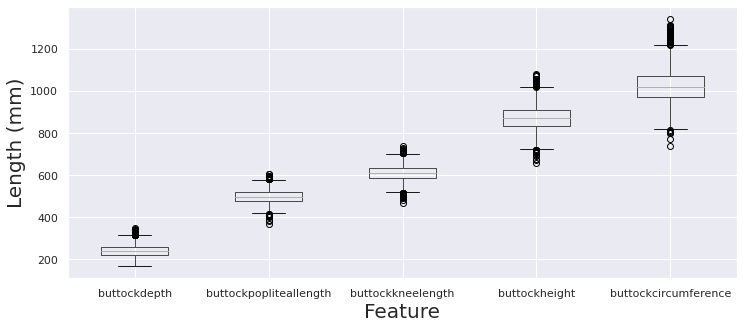

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
buttock_df = ansur_df[['buttockdepth', 'buttockpopliteallength'  , 'buttockkneelength', 'buttockheight', 'buttockcircumference']]
buttock_df.boxplot(ax=ax)
plt.ylabel('Length (mm)', fontsize=20)
plt.xlabel('Feature', fontsize=20)
plt.show()

* จะเห็นว่า ค่าที่มีขนาดสูง ก็จะมีความแปรปรวนสูงตามไปด้วย ดังนั้น ก่อนจะเลือกตัดตัวแปรด้วยความแปรปรวน ก็ควรทำให้สเกลของตัวแปรเท่าๆกันเสียก่อน

# ***Normalizing the variance***

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.005)
sel.fit(ansur_df / ansur_df.mean())

mask = sel.get_support()
reduced_df = ansur_df.loc[:, mask]
print(reduced_df.shape)

(6068, 45)


# ***Counting missing values***

In [ ]:
pokemon_df = pd.read_csv('pokemon.csv')

pokemon_df.isna().sum() / len(pokemon_df)

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

# ***Applying a missing value threshold***

In [ ]:
reduced_df = pokemon_df.loc[:, pokemon_df.isna().sum() / len(pokemon_df) < 0.3]
reduced_df.head()

#                   Name Type 1  Total  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass    318  45      49       49       65   
1  2                Ivysaur  Grass    405  60      62       63       80   
2  3               Venusaur  Grass    525  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass    625  80     100      123      122   
4  4             Charmander   Fire    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

### ***Finding a good variance threshold***

You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as `head_df`.

* Create a boxplot on `head_df`.

In [ ]:
# Create the boxplot
head_df.boxplot()

plt.show()

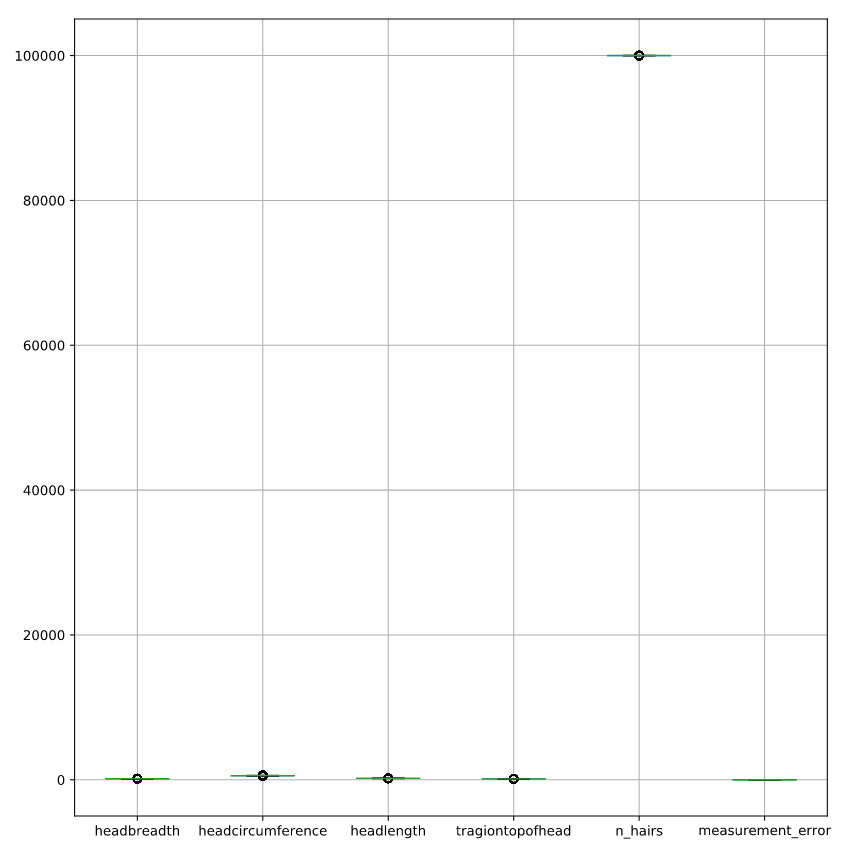

* Normalize the data by dividing the DataFrame with its mean values

In [ ]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

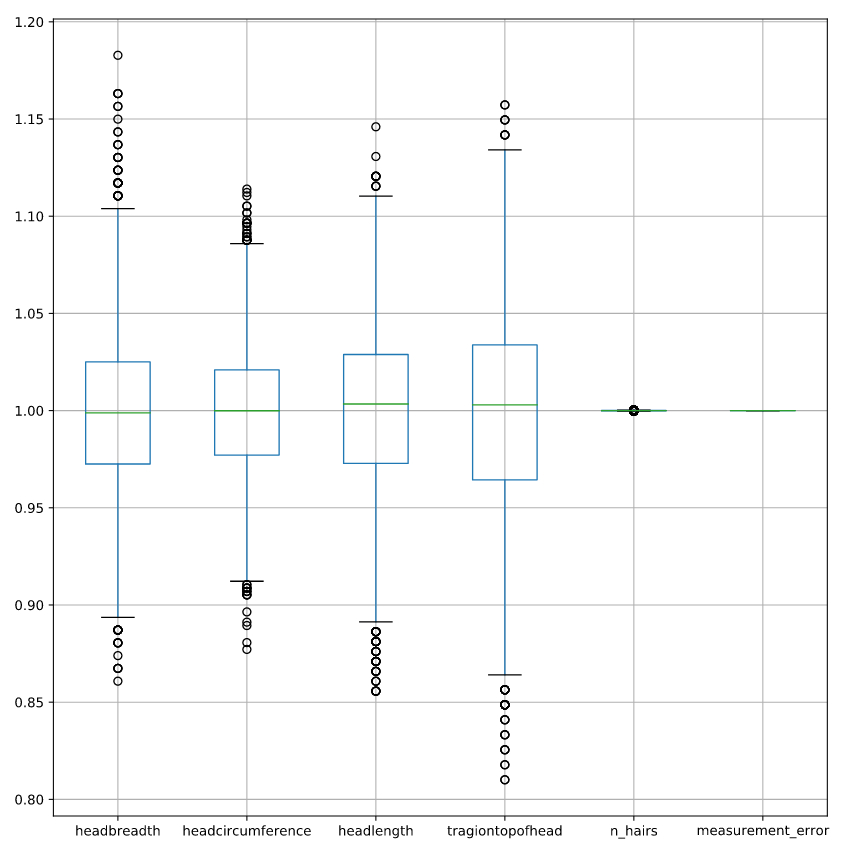

* Print the variances of the normalized data.

```
    headbreadth          1.678952e-03
    headcircumference    1.029623e-03
    headlength           1.867872e-03
    tragiontopofhead     2.639840e-03
    n_hairs              1.002552e-08
    measurement_error    3.231707e-27
```

A threshold of 1.0e-03 (0.001) will remove the two low variance features.

### ***Features with low variance***

In the previous exercise you established that `0.001` is a good threshold to filter out low variance features in `head_df` after normalization. Now use the `VarianceThreshold` feature selector to remove these features.

* Create the variance threshold selector with a threshold of `0.001`.

* Normalize the `head_df` DataFrame by dividing it by its mean values and fit the selector.

* Create a boolean mask from the selector using **`.get_support()`**.

* Create a reduced DataFrame by passing the mask to the **`.loc[]`** method.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")



```
Dimensionality reduced from 6 to 4.
```
### ***Removing features with many missing values***

You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as `school_df`. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.


In [ ]:
school_df = pd.read_csv('Public_Schools2.csv')

# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


The number of features went down from 21 to 19.

# ***Visualizing the correlation matrix***

Reading the correlation matrix of `ansur_df` in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using seaborn.

* Create the correlation matrix.
* Visualize it using Seaborn's heatmap function.

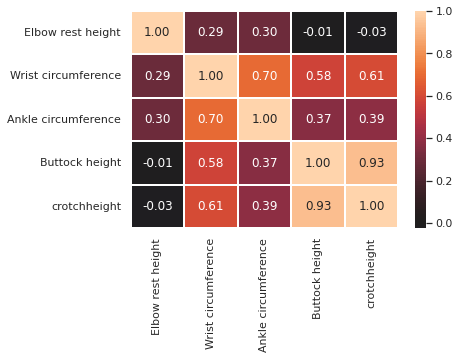

In [ ]:
df1, df2 = pd.read_csv('ANSUR_II_MALE.csv'), pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df1, df2]).drop(columns=['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch'])
ansur_df = ansur_df[['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight',  'crotchheight']]
ansur_df.rename(columns={'elbowrestheight':'Elbow rest height', 'wristcircumference':'Wrist circumference', 'anklecircumference':'Ankle circumference', 'buttockheight':'Buttock height',  'Crotch height':'Crotch height'}, inplace=True)
ansur_df.shape

# Create the correlation matrix
corr = ansur_df.corr()

# Draw a heatmap of the correlation matrix
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

* Create a boolean mask for the upper triangle of the plot.

In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


* Add the mask to the heatmap.

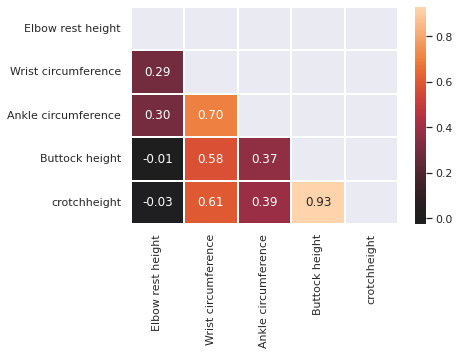

In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

The buttock and crotch height have a 0.93 correlation coefficient.

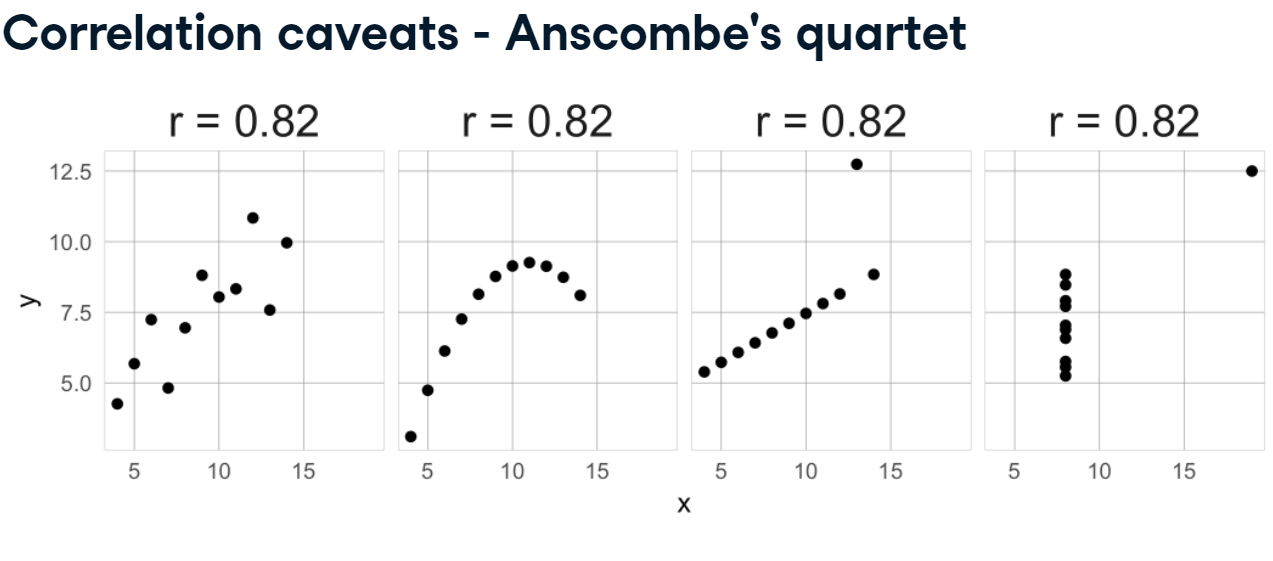

### ***Filtering out highly correlated features***

You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than `0.95` or less than `-0.95`.

Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.

* Calculate the correlation matrix of `ansur_df` and take the absolute value of this matrix.

* Create a boolean mask with `True` values in the upper right triangle and apply it to the correlation matrix.

* Set the correlation coefficient threshold to `0.95`.

* Drop all the columns listed in `to_drop` from the DataFrame.

In [ ]:
ansur_df = pd.read_csv('ANSUR_II_MALE.csv')

# Calculate the correlation matrix and take the absolute value
corr_df = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 88 columns.


### ***Nuclear energy and pool drownings***

The dataset that has been pre-loaded for you as `weird_df` contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.

Let's see if we can find a pattern.

* Print the first five lines of `weird_df`.


In [ ]:
# Print the first five lines of weird_df
print(weird_df.head())



```
   pool_drownings  nuclear_energy
    0             421           728.3
    1             465           753.9
    2             494           768.8
    3             538           780.1
    4             430           763.7
```



* Create a scatterplot with nuclear energy production on the x-axis and the number of pool drownings on the y-axis.

In [ ]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

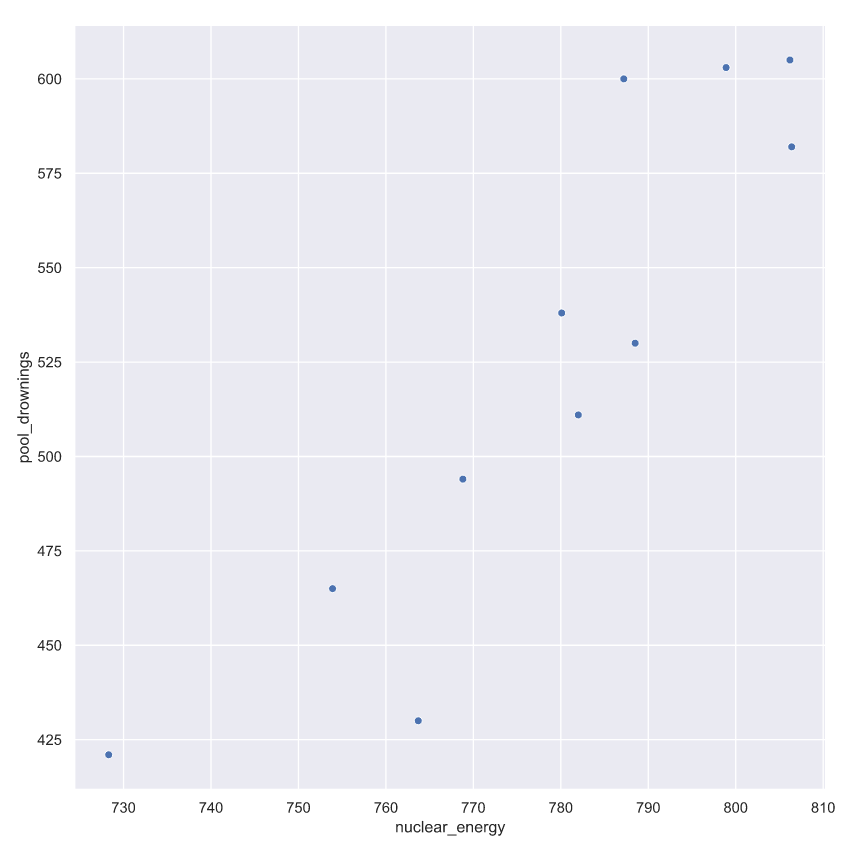

* Print out the correlation matrix of `weird_df`.

In [ ]:
# Print out the correlation matrix of weird_df
print(weird_df.corr())



```
                   pool_drownings  nuclear_energy
    pool_drownings        1.000000        0.901179
    nuclear_energy        0.901179        1.000000
```



# ***Pre-processing the data***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

scaler, lr = StandardScaler(), LogisticRegression(max_iter=10000)

df1, df2 = pd.read_csv('ANSUR_II_MALE.csv'), pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df1, df2])[['Gender', 'chestdepth', 'handlength', 'neckcircumference', 'shoulderlength', 'earlength']]
ansur_df['Gender'] = pd.get_dummies(ansur_df["Gender"], drop_first=True)
X = ansur_df.drop(columns='Gender')
y = ansur_df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_std, X_test_std = scaler.fit_transform(X_train), scaler.transform(X_test)

lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print(accuracy_score(y_test, y_pred))

0.9879187259747392


# ***Inspecting the feature coefficients***

In [ ]:
print(lr.coef_)

[[-3.00972487  0.00996944  7.80540855  1.2237587   0.70639215]]


In [ ]:
print(dict(zip(X.columns, abs(lr.coef_[0]))))

{'chestdepth': 3.009724873065964, 'handlength': 0.009969438150029796, 'neckcircumference': 7.805408552775718, 'shoulderlength': 1.2237587040585876, 'earlength': 0.7063921541390001}


'handlength' ควรถูกนำออก

# ***Recursive Feature Elimination***

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)
rfe.fit(X_train_std, y_train)

Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)

* Dropping a feature will a(ect other feature's coefficients

# ***Inspecting the RFE results***

In [ ]:
X.columns[rfe.support_]

Index(['chestdepth', 'neckcircumference'], dtype='object')

In [ ]:
print(dict(zip(X.columns, rfe.ranking_)))

{'chestdepth': 1, 'handlength': 4, 'neckcircumference': 1, 'shoulderlength': 2, 'earlength': 3}


* ตัวเลข 1 คือตัวที่ถูกเก็บ
* ตัวเลขอื่นๆคือตัวที่ถูกตัดออก โดยเลข 4 ข้างบน คือ โดนตัดออกตั้งแต่รอบแรก

In [ ]:
print(accuracy_score(y_test, rfe.predict(X_test_std)))

0.9807797913234486


ค่าที่ได้ออกมาใกล้เคียงของเดิม แปลว่า ตัวที่ตัดออกไป ไม่ได้อธิบายแบบจำลองได้มากนัก

### ***Building a diabetes classifier***

You'll be using the Pima Indians diabetes dataset to predict whether a person has diabetes using logistic regression. There are 8 features and one target in this dataset. The data has been split into a training and test set and pre-loaded for you as `X_train`, `y_train`, `X_test`, and `y_test`.

A **`StandardScaler()`** instance has been predefined as `scaler` and a **`LogisticRegression()`** one as `lr`.

* Fit the `scaler` on the training features and transform these features in one go.

* Fit the logistic regression model on the scaled training data.

* Scale the test features.

* Predict diabetes presence on the scaled test set.

In [ ]:
diabetes_df = pd.read_csv('PimaIndians.csv')
X = diabetes_df.drop(columns='test')
y = diabetes_df['test']
scaler, lr = StandardScaler(), LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print(f"{accuracy_score(y_test, y_pred):.1%} accuracy on test set.")
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


79.7% accuracy on test set.
{'pregnant': 0.14, 'glucose': 1.24, 'diastolic': 0.1, 'triceps': 0.17, 'insulin': 0.06, 'bmi': 0.34, 'family': 0.25, 'age': 0.43}


We get almost 80% accuracy on the test set. Take a look at the differences in model coefficients for the different features.

### ***Manual Recursive Feature Elimination***

Now that we've created a diabetes classifier, let's see if we can reduce the number of features without hurting the model accuracy too much.

On the second line of code the features are selected from the original DataFrame. Adjust this selection.

A **`StandardScaler()`** instance has been predefined as `scaler` and a **`LogisticRegression()`** one as `lr`.

* First, run the given code, then remove the feature with the lowest model coefficient from `X`.

* Run the code and remove `2` more features with the lowest model coefficients.

* Run the code and only keep the feature with the highest coefficient.

In [ ]:
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.")  
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

75.5% accuracy on test set.
{'glucose': 1.28}


Removing all but one feature only reduced the accuracy by a few percent.

### ***Automatic Recursive Feature Elimination***

Now let's automate this recursive process. Wrap a Recursive Feature Eliminator (RFE) around our logistic regression estimator and pass it the desired number of features.

* Create the RFE with a **`LogisticRegression()`** estimator and 3 features to select.
* Print the features and their ranking.
* Print the features that are not eliminated.

In [ ]:
diabetes_df = pd.read_csv('PimaIndians.csv')
X = diabetes_df.drop(columns='test')
y = diabetes_df['test']
scaler, lr = StandardScaler(), LogisticRegression(max_iter=1000000000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=0)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print(f"{acc:.1%} accuracy on test set.") 

{'pregnant': 4, 'glucose': 1, 'diastolic': 6, 'triceps': 5, 'insulin': 3, 'bmi': 1, 'family': 2, 'age': 1}
Index(['glucose', 'bmi', 'age'], dtype='object')
75.9% accuracy on test set.


When we eliminate all but the 3 most relevant features we get a 75.9% accuracy on the test set.  

* คำตอบไม่เหมือน ไม่รู้ทำไม มี pregnant โผล่มา

# ***Random Forest Classifier***

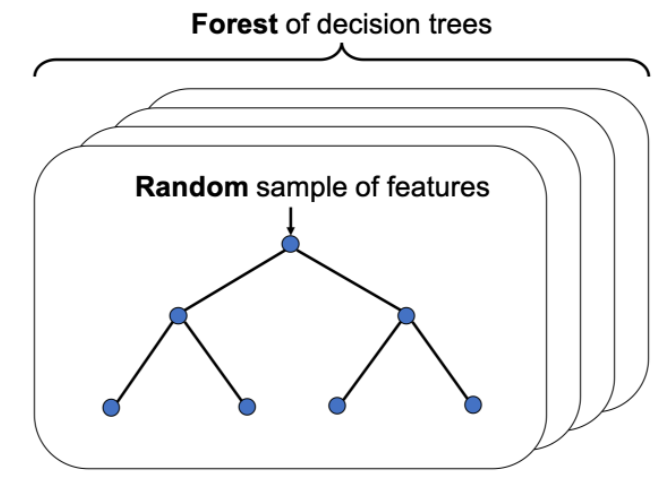

* This picture has 4 decision trees.
* Random Forest passes different random subsets of features to a number of decision trees.
* Make a prediction by aggregating over the predictions of individual trees.

## ***Below is the use of Random Forest to predice ANSUR Gender***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df1, df2 = pd.read_csv('ANSUR_II_MALE.csv'), pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df1, df2]).drop(columns=['BMI_class', 'Height_class', 'Component', 'Branch'])
X = ansur_df.drop(columns='Gender')
y = ansur_df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(accuracy_score(y_test, rf.predict(X_test)))

0.9884678747940692


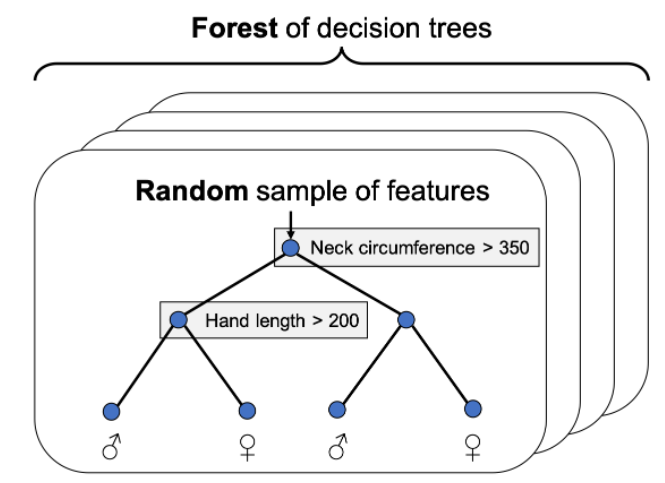

* The first decision tree uses the `Neck circumference` on the first decision node and `Hand length` later on to determine if a person was male of female.

* By averaging how often features are used to make decisions inside the different decision trees.

  * More important features are near the root of the trees
  * Less important features are in small branches of the trees

Random Forest calculate feature ***important values*** using **`.feature_importances_`**.

# ***Feature importance values***

In [ ]:
print(f'rf.feature_importances_ = {rf.feature_importances_}, \n\n')
print(f'sum(rf.feature_importances_) = {sum(rf.feature_importances_)}')

rf.feature_importances_ = [0.00107555 0.00133844 0.00045945 0.00082845 0.0006505  0.02076221
 0.00576793 0.04544892 0.00303124 0.00678622 0.02238446 0.01269668
 0.00071925 0.00635218 0.00141734 0.01369367 0.00284604 0.00055266
 0.00267096 0.00173341 0.00135906 0.03305861 0.00095779 0.00150377
 0.00701066 0.04494255 0.0003254  0.00631101 0.00076216 0.00069259
 0.0005372  0.00195399 0.00052477 0.00278529 0.00608244 0.01935397
 0.00080245 0.04029691 0.00566963 0.00162823 0.00062069 0.07657559
 0.05039225 0.00067656 0.00140302 0.00076001 0.00047531 0.01982703
 0.0005859  0.01479299 0.02915134 0.00047917 0.00043951 0.00677144
 0.01212738 0.0004083  0.00054392 0.00134276 0.01859901 0.00460112
 0.00178433 0.09461142 0.12231827 0.00090984 0.00027086 0.00392549
 0.00157283 0.07466466 0.00044933 0.00126207 0.00347046 0.02572656
 0.00445479 0.01030705 0.0015136  0.00100934 0.00869522 0.00098702
 0.00056067 0.00081025 0.00051594 0.00072497 0.00113985 0.01635432
 0.00144414 0.00146491 0.00121597 0.

Feature importance values จาก **`rf.feature_importances_ `**สามารถเอามาใช้เลือกตัวแปรได้ เช่น สมมติอยากเลือกตัวแปรที่มีน้ำหนักความสำคัญมากกว่า 5%

In [ ]:
X_reduced = X.loc[:, rf.feature_importances_ > 0.05]
print(X_reduced.columns)

Index(['handbreadth', 'handcircumference', 'neckcircumference',
       'neckcircumferencebase', 'shouldercircumference'],
      dtype='object')


# ***RFE with random forests***

* ใช้ในการตัดตัวแปรออกทีละตัว

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6, verbose=1)
# ทำให้แสดงทีละ 10
# rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6, verbose=1, step=10)
rfe.fit(X_train,y_train)
print(accuracy_score(y_test, rfe.predict(X_test)))

Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 fe

## ***Remaining Columns Names***

In [ ]:
print(X.columns[rfe.support_])

Index(['biacromialbreadth', 'handcircumference', 'hipbreadthsitting',
       'neckcircumference', 'neckcircumferencebase', 'shouldercircumference'],
      dtype='object')


### ***Building a random forest model***

You'll again work on the Pima Indians dataset to predict whether an individual has diabetes. This time using a random forest classifier. You'll fit the model on the training data after performing the train-test split and consult the feature importance values.

The feature and target datasets have been pre-loaded for you as `X` and `y`. Same goes for the necessary packages and functions.

* Set a 25% test size to perform a 75%-25% train-test split.
* Fit the random forest classifier to the training data.
* Calculate the accuracy on the test set.
* Print the feature importances per feature.

In [ ]:
diabetes_df = pd.read_csv('PimaIndians.csv')
X = diabetes_df.drop(columns='test')
y = diabetes_df['test']

### Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print(f"{acc:.1%} accuracy on test set.") 

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


The random forest model gets 79.6% accuracy on the test set and `'glucose'` is the most important feature (`0.25`).

### ***Random forest for feature selection***

Now lets use the fitted random model to select the most important features from our input dataset `X`.

The trained model from the previous exercise has been pre-loaded for you as `rf`.

* Create a `mask` for features with an importance higher than `0.12`.
* Sub-select the most important features by applying the `mask` to `X`.

In [ ]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.12

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'insulin', 'age'], dtype='object')


Only the features `'glucose'` and `'age'` were considered sufficiently important.  แล้ว `'insulin'` ล่ะ

### ***Recursive Feature Elimination with random forests***

You'll wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.

You'll need these pre-loaded datasets: `X`, `X_train`, `y_train`.

Functions and classes that have been pre-loaded for you are: **`RandomForestClassifier()`**, **`RFE()`**, **`train_test_split()`**.

* Create a recursive feature eliminator that will select the 2 most important features using a random forest model.
* Fit the recursive feature eliminator to the training data.
* Create a mask using the fitted eliminator's **`.support_`** attribute, then apply it to the feature dataset `X`.

In [ ]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'insulin'], dtype='object')


* ระวังด้วย ตัว Random Forest ถ้าไม่ได้กำหนด random_state อาจมีตัวแปรบางตัวที่ต่างกัน

* Compared to the quick and dirty single threshold method from the previous exercise ***one of the selected features is different.***

### ***Creating a LASSO regressor***

You'll be working on the numeric ANSUR body measurements dataset to predict a persons Body Mass Index (`BMI`) using the pre-imported **`Lasso()`** regressor. `BMI` is a metric derived from body height and weight but those two features have been removed from the dataset to give the model a challenge.

You'll standardize the data first using the **`StandardScaler()`** that has been instantiated for you as `scaler` to make sure all coefficients face a comparable regularizing force trying to bring them down.

All necessary functions and classes plus the input datasets `X` and `y` have been pre-loaded.

* Set the test size to 30% to get a 70-30% train test split.

* Fit the scaler on the training features and transform these in one go.

* Create the **`Lasso`** model.

* Fit it to the scaled training data.

In [8]:
ansur_df = pd.read_csv('ANSUR_II_MALE.csv').drop(columns=['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch'])
ansur_df.shape
X = ansur_df.drop(columns='BMI')
y = ansur_df['BMI']
scaler = StandardScaler()

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso()

You've fitted the Lasso model to the standardized training data. Now let's look at the results!

### ***Lasso model results***

Now that you've trained the **`Lasso`** model, you'll score its predictive capacity ($R^2$) on the test set and count how many features are ignored because their coefficient is reduced to zero.

The `X_test` and `y_test` datasets have been pre-loaded for you.

The **`Lasso()`** model and **`StandardScaler()`** have been instantiated as `la` and `scaler` respectively and both were fitted to the training data.

* Transform the test set with the pre-fitted scaler.
* Calculate the $R^2$ value on the scaled test data.
* Create a list that has True values when coefficients equal 0.
* Calculate the total number of features with a coefficient of 0.

In [9]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print(f"The model has ignored {n_ignored} out of {len(la.coef_)} features.")

The model can predict 84.7% of the variance in the test set.
The model has ignored 84 out of 93 features.


We can predict almost 85% of the variance in the BMI value using just 9 out of 93 of the features. The $R^2$ could be higher though.

### ***Adjusting the regularization strength***

Your current **`Lasso`** model has an  score of 84.7%. When a model applies overly powerful regularization it can suffer from high bias, hurting its predictive power.

Let's improve the balance between predictive power and model simplicity by tweaking the **`alpha`** parameter.

* Find the highest value for **`alpha`** that gives an $R^2$ value above 98% from the options: `1`, `0.5`, `0.1`, and `0.01`.

In [14]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")
print(f"{n_ignored_features} out of {len(la.coef_)} features were ignored.")

The model can predict 99.2% of the variance in the test set.
75 out of 93 features were ignored.


With this more appropriate regularization strength we can predict 98% of the variance in the `BMI` value while ignoring 2/3 of the features.

# ***LassoCV regressor***

* ให้ค่า $\alpha$ ที่เหมาะสมที่สุด

In [16]:
from sklearn.linear_model import LassoCV

lcv = LassoCV()
lcv.fit(X_train, y_train)
print(lcv.alpha_)

0.4040803504060367


# ***Feature selection with LassoCV***

In [17]:
from sklearn.linear_model import LassoCV

lcv = LassoCV()
lcv.fit(X_train, y_train)
lcv.score(X_test, y_test)

0.9908355731772244

In [18]:
lcv_mask = lcv.coef_ != 0
sum(lcv_mask)

38

# ***Feature selection with random forest***

In [21]:
rfe_rf = RFE(estimator=RandomForestRegressor(),  n_features_to_select=38, step=5, verbose=1)
rfe_rf.fit(X_train, y_train)
rf_mask = rfe_rf.support_

Fitting estimator with 93 features.
Fitting estimator with 88 features.
Fitting estimator with 83 features.
Fitting estimator with 78 features.
Fitting estimator with 73 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 58 features.
Fitting estimator with 53 features.
Fitting estimator with 48 features.
Fitting estimator with 43 features.


# ***Feature selection with gradient boosting***

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=38, step=5, verbose=1)
rfe_gb.fit(X_train, y_train)
gb_mask = rfe_gb.support_

Fitting estimator with 93 features.
Fitting estimator with 88 features.
Fitting estimator with 83 features.
Fitting estimator with 78 features.
Fitting estimator with 73 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 58 features.
Fitting estimator with 53 features.
Fitting estimator with 48 features.
Fitting estimator with 43 features.


# ***Combining the feature selectors***

เลือกว่าจะเอาอันไหน

In [23]:
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

[3 2 0 1 3 0 0 0 3 0 1 0 1 0 1 3 3 1 0 0 3 2 0 3 3 1 1 1 1 0 0 0 1 2 1 0 0
 3 3 0 2 0 1 0 0 1 0 2 1 0 0 2 1 0 0 1 0 1 0 3 0 3 1 2 0 3 0 3 1 0 3 2 0 1
 3 0 3 3 1 3 0 1 1 0 1 3 3 1 3 1 1 3 2]


เลือกจะเอาอันที่ถูกโหวตว่าควรอยู่เป็นตัวแปรที่ถูกเลือก จาก 2 แบบจำลองขึ้นไป

In [26]:
mask = votes >= 2
reduced_X = X.loc[:, mask]
print(reduced_X.shape)
print(reduced_X.columns)

(4082, 32)
Index(['abdominalextensiondepthsitting', 'acromialheight', 'axillaheight',
       'bicepscircumferenceflexed', 'buttockcircumference', 'buttockdepth',
       'calfcircumference', 'cervicaleheight', 'chestcircumference',
       'chestdepth', 'eyeheightsitting', 'forearmcircumferenceflexed',
       'forearmforearmbreadth', 'functionalleglength',
       'heelanklecircumference', 'iliocristaleheight',
       'lowerthighcircumference', 'neckcircumference',
       'overheadfingertipreachsitting', 'poplitealheight',
       'shouldercircumference', 'sittingheight', 'sleevelengthspinewrist',
       'suprasternaleheight', 'thighcircumference', 'thighclearance',
       'tibialheight', 'waistcircumference', 'waistdepth',
       'waistheightomphalion', 'weight_kg', 'stature_m'],
      dtype='object')


### ***Creating a `LassoCV` regressor***

You'll be predicting biceps circumference on a subsample of the male ANSUR dataset using the **`LassoCV()`** regressor that automatically tunes the regularization strength (**`alpha`** value) using Cross-Validation.

The standardized training and test data has been pre-loaded for you as `X_train`, `X_test`, `y_train`, and `y_test`.

* Create and fit the **`LassoCV`** model on the training set.
* Calculate  on the test set.
* Create a mask for coefficients not equal to zero.

In [36]:
biceps_df = ansur_df[['acromialheight', 'axillaheight', 'bideltoidbreadth', 'buttockcircumference', 'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight', 'chestcircumference', 'chestheight',
       'earprotrusion', 'footbreadthhorizontal', 'forearmcircumferenceflexed', 'handlength', 'headbreadth', 'heelbreadth', 'hipbreadth', 'iliocristaleheight', 'interscyeii',
       'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'neckcircumferencebase', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'sleeveoutseam',
       'thighcircumference', 'thighclearance', 'verticaltrunkcircumferenceusa', 'waistcircumference', 'waistdepth', 'wristheight', 'BMI', 'bicepscircumferenceflexed']].iloc[:1000]

X = biceps_df.drop(columns='bicepscircumferenceflexed')
y = biceps_df['bicepscircumferenceflexed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print(f'Optimal alpha = {lcv.alpha_:.3f}')

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print(f'The model explains {r_squared:.1%} of the test set variance')

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print(f'{sum(lcv_mask)} features out of {len(lcv_mask)} selected')


Optimal alpha = 2.835
The model explains 87.0% of the test set variance
24 features out of 32 selected


We got a decent R squared and removed 8 features. We'll save the `lcv_mask` for later on.

### ***Ensemble models for extra votes***

The **`LassoCV()`** model selected 24 out of 32 features. Not bad, but not a spectacular dimensionality reduction either. Let's use two more models to select the `10` features they consider most important using the Recursive Feature Eliminator (RFE).

The standardized training and test data has been pre-loaded for you as `X_train`, `X_test`, `y_train`, and `y_test`.

* Select `10` features with RFE on a `GradientBoostingRegressor` and drop `3` features on each step.
* Calculate the $R^2$ on the test set.
* Assign the support array of the fitted model to `gb_mask`.

In [37]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 83.8% of the variance in the test set


* Modify the first step to select 10 features with RFE on a **`RandomForestRegressor()`** and drop 3 features on each step

In [38]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# อย่าลืม rescale ก่อน

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to rf_mask
rf_mask = rfe_rf.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 83.0% of the variance in the test set


 Including the Lasso linear model from the previous exercise, we now have the votes from 3 models on which features are important.

 ### ***Combining 3 feature selectors***

We'll combine the votes of the 3 models you built in the previous exercises, to decide which features are important into a meta mask. We'll then use this mask to reduce dimensionality and see how a simple linear regressor performs on the reduced dataset.

The per model votes have been pre-loaded as `lcv_mask`, `rf_mask`, and `gb_mask` and the feature and target datasets as `X` and `y`.

* Sum the votes of the three models using **`np.sum()`**.
* Create a mask for features selected by all 3 models.
* Apply the dimensionality reduction on `X` and print which features were selected.

In [40]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes == 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)

Index(['bideltoidbreadth', 'buttockcircumference', 'chestcircumference',
       'forearmcircumferenceflexed', 'hipbreadth', 'interscyeii',
       'shouldercircumference', 'thighcircumference'],
      dtype='object')


* Plug the reduced dataset into the code for simple linear regression.

In [43]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes == 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set using {len(lm.coef_)} features.')

The model can explain 87.0% of the variance in the test set using 8 features.


Using the votes from 3 models you were able to select just 8 features that allowed a simple linear model to get a high accuracy!

### ***Manual feature extraction I***

You want to compare prices for specific products between stores. The features in the pre-loaded dataset `sales_df` are: `storeID`, `product`, `quantity` and `revenue`. The `quantity` and `revenue` features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

* Calculate the product `price` from the `quantity` sold and total `revenue`.
* Drop the `quantity` and `revenue` features from the dataset.

In [46]:
sales_df = pd.read_csv('grocery_sales.csv')

# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue']/sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


When you understand the dataset well, always check if you can calculate relevant features and drop irrelevant ones.

### ***Manual feature extraction II***

You're working on a variant of the ANSUR dataset, `height_df`, where a person's height was measured 3 times: `height_1`, `height_2`, `height_3`. Add a feature with the mean height to the dataset, then drop the 3 original features.

* Add a feature with the mean height to the dataset. Use the **`.mean()`** method with **`axis=1`**.

* Drop the 3 original height features from the dataset.

In [ ]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())



```
   weight_kg  height_1  height_2  height_3
0       81.5      1.78      1.80      1.80
1       72.6      1.70      1.70      1.69
2       92.9      1.74      1.75      1.73
3       79.4      1.66      1.68      1.67
4       94.6      1.91      1.93      1.90

<script.py> output:
       weight_kg  height
    0       81.5   1.793
    1       72.6   1.697
    2       92.9   1.740
    3       79.4   1.670
    4       94.6   1.913
```
You've calculated a new feature that is still easy to understand compared to, for instance, principal components.

# ***Calculating the principal components***

* ต้องใช้ **`StandardScaler()`** ก่อน เพราะ PCA ใช้ไม่ค่อยดีถ้าไม่ทำ
* Components จัดอันดับจากสำคัญมากมาน้อย โดยใช้ **`.explained_variance_ratio_`**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
std_df = scaler.fit_transform(df)

pca = PCA()
print(pca.fit_transform(std_df))



```
[[-0.08320426 -0.12242952]
[ 0.31478004 0.57048158]
...
[-0.5609523 0.13713944]
[-0.0448304 -0.37898246]]

```
# ***Principal component explained variance ratio***



In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(std_df)
print(pca.explained_variance_ratio_)

* Component ที่ 1 อธิบายความแปรปรวนในข้อมูลได้ 90% 
* Component ที่ 2 อธิบายความแปรปรวนในข้อมูลได้ 10% 
* ในข้อมูลที่มี ค่า สหสัมพันธ์ สูง components แรกๆ จะเป็นตัวอธิบายความแปรปรวนในข้อมูล
  * นั่นหมายความว่า components ส่วนหลังๆ สามารถโยนทิ้งได้

# ***PCA for dimensionality reduction***

In [9]:
scaler = StandardScaler()

df1, df2 = pd.read_csv('ANSUR_II_MALE.csv'), pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df1, df2]).drop(columns=['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch'])
ansur_std_df = scaler.fit_transform(ansur_df)

pca = PCA()
pca.fit_transform(ansur_std_df)
print(np.around(pca.explained_variance_ratio_, 2))

[0.56 0.13 0.05 0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


* จะเห็นว่า สอง components แรก อธิบายความแปรปวนได้ 56% และ 13% ตามลำดับ

### ***Calculating Principal Components***

You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's **`pairplot()`**. This will allow you to inspect the pairwise correlations between the features.

The data has been pre-loaded for you as `ansur_df`.

* Create a Seaborn pairplot to inspect `ansur_df`.

In [ ]:
sns.pairplot(ansur_df)

plt.show()

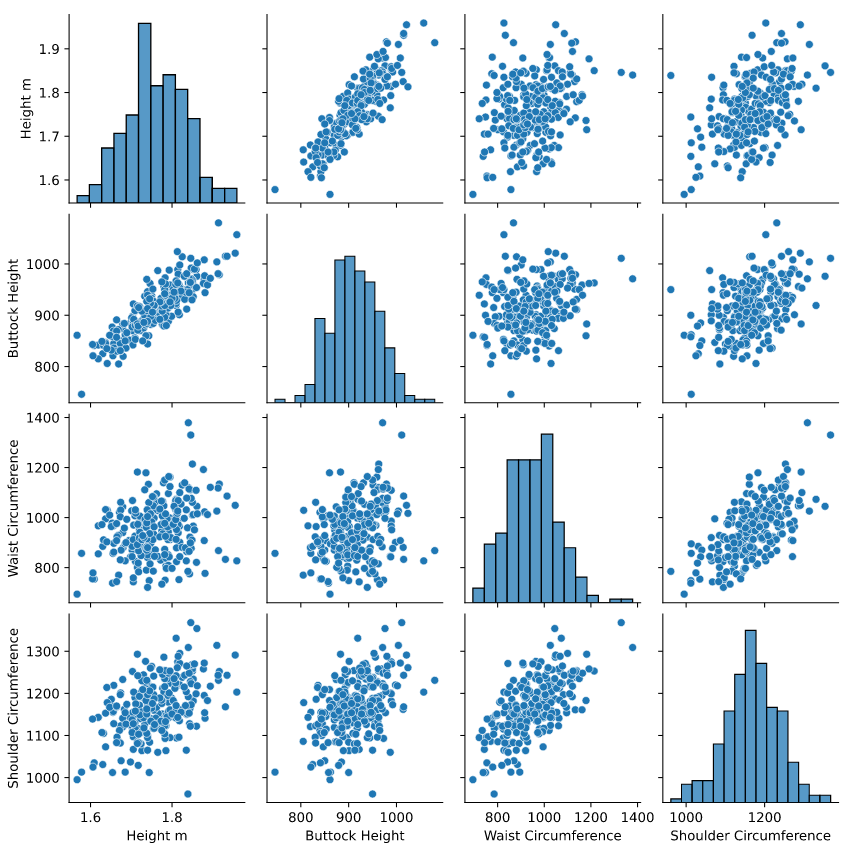

* Create the scaler and standardize the data.
* Create the **`PCA()`** instance and fit and transform the standardized data.
* Create a pairplot of the principal component DataFrame.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

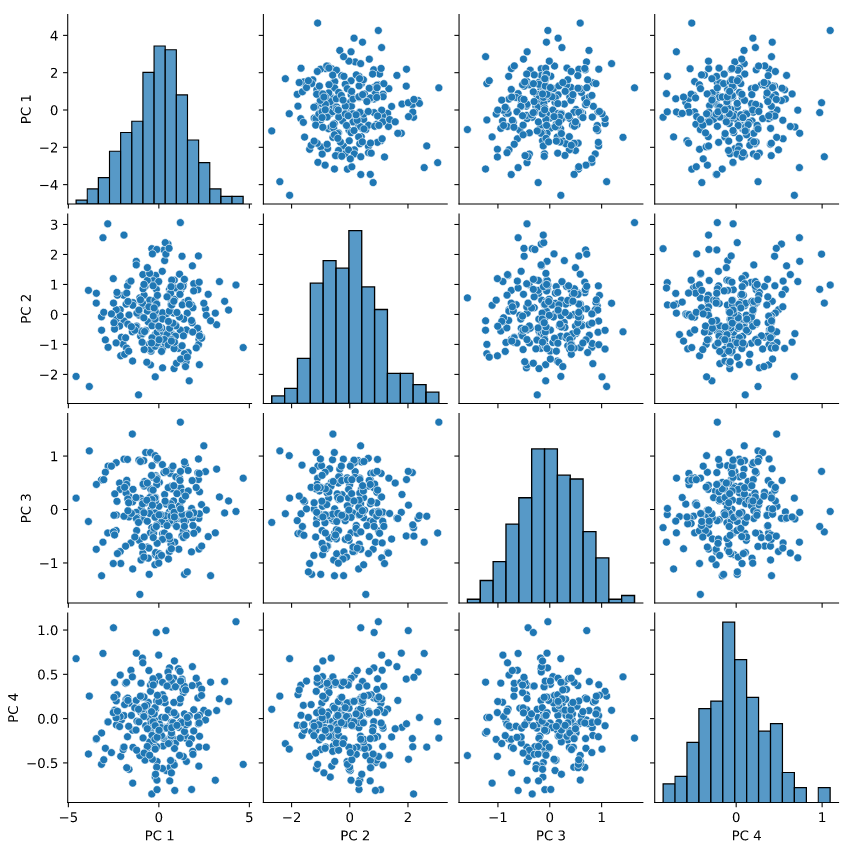

Notice how, in contrast to the input features, none of the principal components are correlated to one another.

### ***PCA on a larger dataset***

You'll now apply **`PCA`** on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as `ansur_df`. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.

* Create the `scaler`.
* Standardize the data.
* Create the **`PCA()`** instance.
* Fit it to the standardized data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

You've fitted PCA on our 13 feature datasample. Now let's see how the components explain the variance.

### ***PCA explained variance***

You'll be inspecting the variance explained by the different principal components of the `pca` instance you created in the previous exercise.

* Print the explained variance ratio per principal component.

In [ ]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)



```
[0.61449404 0.19893965 0.06803095 0.03770499 0.03031502 0.0171759  0.01072762 0.00656681 0.00634743 0.00436015 0.0026586  0.00202617 0.00065268]
```



In [ ]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum()) 



```
[0.61449404 0.81343368 0.88146463 0.91916962 0.94948464 0.96666054 0.97738816 0.98395496 0.99030239 0.99466254 0.99732115 0.99934732 1 ]
```


What's the lowest number of principal components you should keep if you don't want to lose more than 10% of explained variance during dimensionality reduction?

- Using just 4 principal components we can explain more than 90% of the variance in the 13 feature dataset.

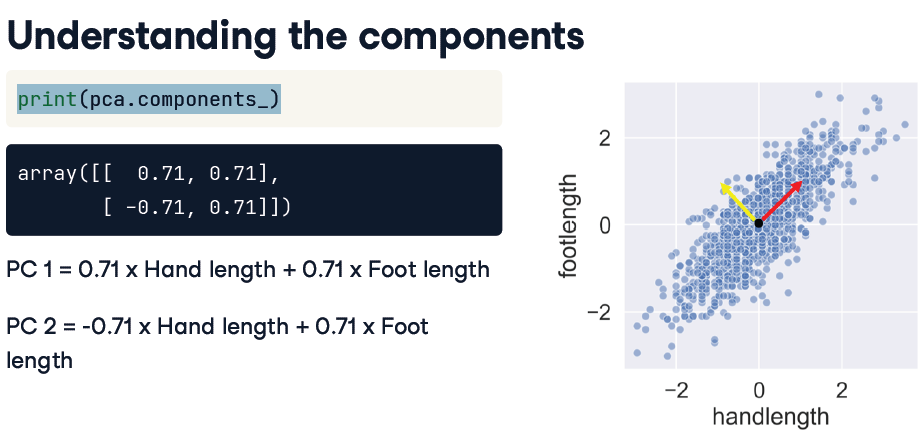

# ***PCA in a pipeline***

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

df1, df2 = pd.read_csv('ANSUR_II_MALE.csv'), pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df1, df2]).drop(columns=['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch'])

pipe = Pipeline([('scaler', StandardScaler()),('reducer', PCA())])
pc = pipe.fit_transform(ansur_df)
print(pc[:,:2])

[[-3.46114925  1.5785215 ]
 [ 0.90860615  2.02379935]
 [-5.67095916 -1.18734049]
 ...
 [ 3.79205633 -2.36698389]
 [10.7569818  -1.40222755]
 [ 7.64802025  1.07406209]]


# ***Checking the effect of categorical features***

In [15]:
df1, df2 = pd.read_csv('ANSUR_II_MALE.csv'), pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_categories = pd.concat([df1, df2])[['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class']]
ansur_categories.head()

Branch     Component Gender   BMI_class Height_class
0             Combat Arms  Regular Army   Male  Overweight         Tall
1          Combat Support  Regular Army   Male  Overweight       Normal
2          Combat Support  Regular Army   Male  Overweight       Normal
3  Combat Service Support  Regular Army   Male  Overweight       Normal
4  Combat Service Support  Regular Army   Male  Overweight         Tall

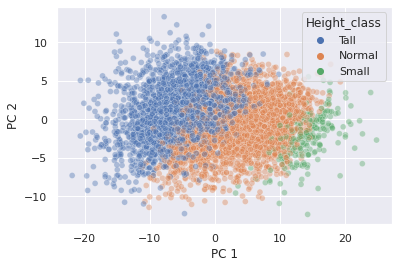

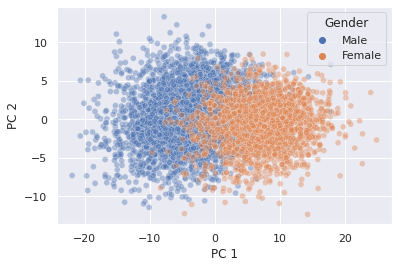

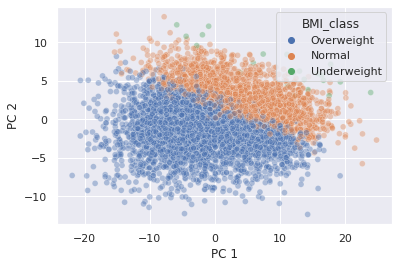

In [22]:
ansur_categories['PC 1'] = pc[:,0]
ansur_categories['PC 2'] = pc[:,1]
sns.scatterplot(data=ansur_categories, x='PC 1', y='PC 2', hue='Height_class', alpha=0.4)
plt.show()
sns.scatterplot(data=ansur_categories, x='PC 1', y='PC 2', hue='Gender', alpha=0.4)
plt.show()
sns.scatterplot(data=ansur_categories, x='PC 1', y='PC 2', hue='BMI_class', alpha=0.4)
plt.show()

# ***PCA in a model pipeline***

In [24]:
scaler = StandardScaler()
df1, df2 = pd.read_csv('ANSUR_II_MALE.csv'), pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df1, df2]).drop(columns=['BMI_class', 'Height_class', 'Component', 'Branch'])
X = ansur_df.drop(columns='Gender')
y = ansur_df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=3)), # calculate only 3 components
                 ('classifier', RandomForestClassifier())])
pipe.fit(X_train, y_train)
pipe['reducer'].explained_variance_ratio_ 

array([0.55399049, 0.13180409, 0.05101505])

In [25]:
print(pipe.score(X_test, y_test))

0.989452867501648


### ***Understanding the components***

You'll apply PCA to the numeric features of the Pokemon dataset, `poke_df`, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (**`Pipeline()`**, **`StandardScaler()`**, **`PCA()`**).

* Build the pipeline with the `scaler` and `PCA`, set the number of components to calculate to `2`.
* Fit the pipeline to the `poke_df` dataset and extract the component vectors.

In [30]:
poke_df = pd.read_csv('pokemon.csv')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit_transform(poke_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))


PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


For ocomponent 1: All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality (high stats).

For ocomponent 2: Defense has a strong positive effect on the second component and speed a strong negative one. This component quantifies an agility versus armor and protection trade-off.

### ***PCA for feature exploration***
You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in `poke_df`. These categorical features (`Type` & `Legendary`) can be found in a separate DataFrame `poke_cat_df`.

All relevant packages and classes have been pre-loaded for you (`Pipeline()`, `StandardScaler()`, `PCA()`)


- Fit and transform the pipeline to `poke_df` to extract the principal components.

In [34]:
poke_cat_df = pd.read_csv('pokemon.csv')[['Type 1', 'Legendary']]
poke_cat_df.rename(columns={'Type 1': 'Type'}, inplace=True)

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


* Add the 2 components to `poke_cat_df`

In [35]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

print(poke_cat_df.head())

    Type  Legendary      PC 1      PC 2
0  Grass      False -1.556375 -0.021482
1  Grass      False -0.362867 -0.050269
2  Grass      False  1.280152 -0.062720
3  Grass      False  2.620916  0.704263
4   Fire      False -1.758284 -0.706179


* Use the `Type` feature to color the PC 1 versus PC 2 scatterplot.

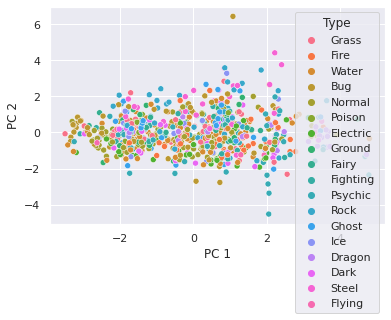

In [36]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type')
plt.show()

* Use the Legendary feature to color the PC 1 versus PC 2 scatterplot.

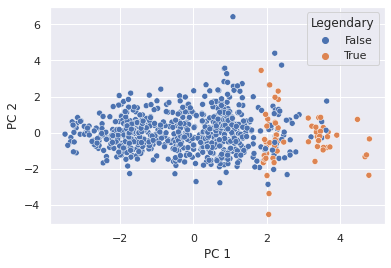

In [37]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

Looks like the different types are scattered all over the place while the legendary Pokemon always score high for PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently fast and vulnerable nor slow and armored.

### ***PCA in a model pipeline***

We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

The data has been pre-loaded for you and split into training and tests datasets: `X_train`, `X_test`, `y_train`, `y_test`.

Same goes for all relevant packages and classes(`Pipeline()`, `StandardScaler()`, `PCA()`, `RandomForestClassifier()`).

* Add a `scaler`, `PCA` limited to `2` components, and random forest classifier with `random_state=0` to the `pipeline`.
* Fit the pipeline to the training data.

In [41]:
poke_df = pd.read_csv('pokemon.csv')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']]
X = poke_df.drop(columns='Legendary')
y = poke_df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)

[0.43888005 0.18644176]


* Score the model accuracy on the test set.

In [42]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')


94.5% test set accuracy


* Repeat the process with 3 extracted components.

In [43]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

[0.43888005 0.18644176 0.1362488 ]
95.0% test set accuracy


* การใส่ component เพิ่มเข้ามาอาจจะทำให้คะแนนเพิ่มหรือลดก็ได้

# ***Setting an explained variance threshold***

* ใส่ **`n_components`** ที่อยู่ระหว่าง 0 ถึง 1 จะเป็นการบอกให้ PCA คัดจำนวน component ออกเหลือแค่จำนวนที่อธิบายได้ตามตัวเลข **`n_components`** $\times 100$ %

In [2]:
poke_df = pd.read_csv('pokemon.csv')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# คัดจำนวน component ออกให้เหลือแค่ตัวที่อธิบายความแปรปรวนของข้อมูลได้ 90%
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=0.9))]) 

# Fit the pipe to the data
pipe.fit(poke_df)
print(len(pipe['reducer'].components_))

5


* ไม่ว่าจะกำหนดค่าตัวเลขของ **`n_components`** เป็นแบบจำนวนเต็มหรืออัตราส่วน ก็ยังถือว่าไม่มีหลักการใดๆรองรับ

# ***An optimal number of components***



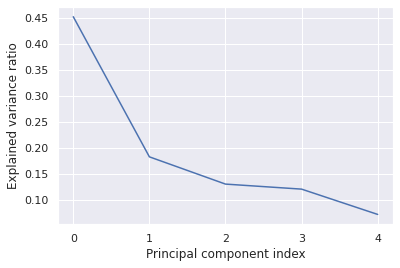

In [6]:
pipe.fit(poke_df)
var = pipe['reducer'].explained_variance_ratio_
plt.plot(var)
plt.xlabel('Principal component index') # index ไม่ใช่จำนวน
plt.ylabel('Explained variance ratio')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

# ***PCA Operations***

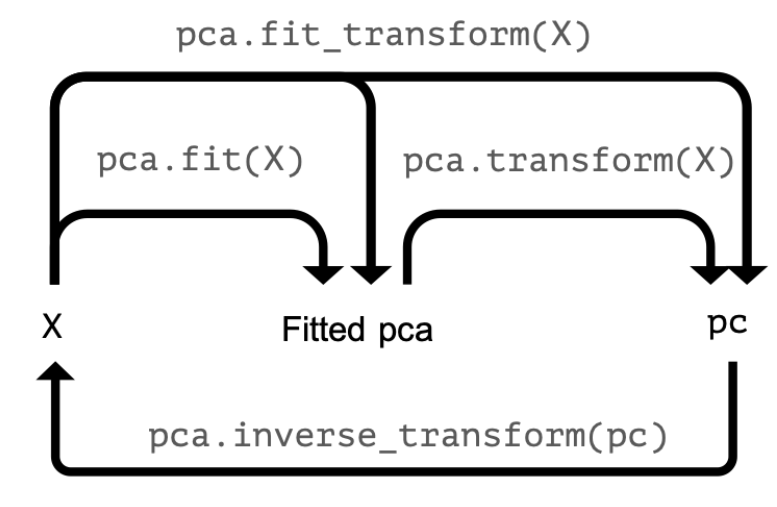

### ***Selecting the proportion of variance to keep***

You'll let **`PCA`** determine the number of components to calculate based on an explained variance threshold that you decide.

You'll work on the numeric ANSUR female dataset pre-loaded as `ansur_df`.

All relevant packages and classes have been pre-loaded too (**`Pipeline()`**, **`StandardScaler()`**, **`PCA()`**).

* Pipe a `scaler` to **`PCA`** selecting `80%` of the variance.
* Fit the `pipe` to the data.

In [10]:
ansur_df = pd.read_csv('ANSUR_II_FEMALE.csv').drop(columns=['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch'])

# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print(f'{len(pipe["reducer"].components_)} components selected')

11 components selected


* Increase the proportion of variance to keep to 90%.

In [11]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print(f'{len(pipe["reducer"].components_)} components selected')

23 components selected


We need to more than double the number of components to go from 80% to 90% explained variance.

### ***Choosing the number of components***

You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as `ansur_df`.

All relevant packages and classes have been pre-loaded for you (**`Pipeline()`**, **`StandardScaler()`**, **`PCA()`**).

* Create a `pipeline` with a `scaler` and **`PCA`** selecting 10 components.
* Fit the pipe to the data.
* Plot the explained variance ratio.

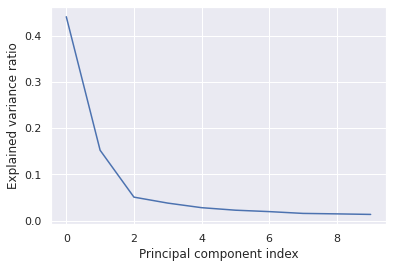

In [13]:
ansur_df = pd.read_csv('ANSUR_II_FEMALE.csv').drop(columns=['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch'])

# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

The 'elbow' in the plot is at 3 components (the 3rd component has index 2).

### ***PCA for image compression***

You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array `X_test`. Each of the 784 pixels has a value between `0` and `255` and can be regarded as a feature.

A pipeline with a `scaler` and **`PCA`** model to select 78 components has been pre-loaded for you as `pipe`. This **`pipeline`** has already been fitted to the entire MNIST dataset except for the 16 samples in `X_test`.

Finally, a function `plot_digits` has been created for you that will plot 16 images in a grid.

* Plot the MNIST sample data.

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 300))
    plt.show()

plot_digits(X_test)

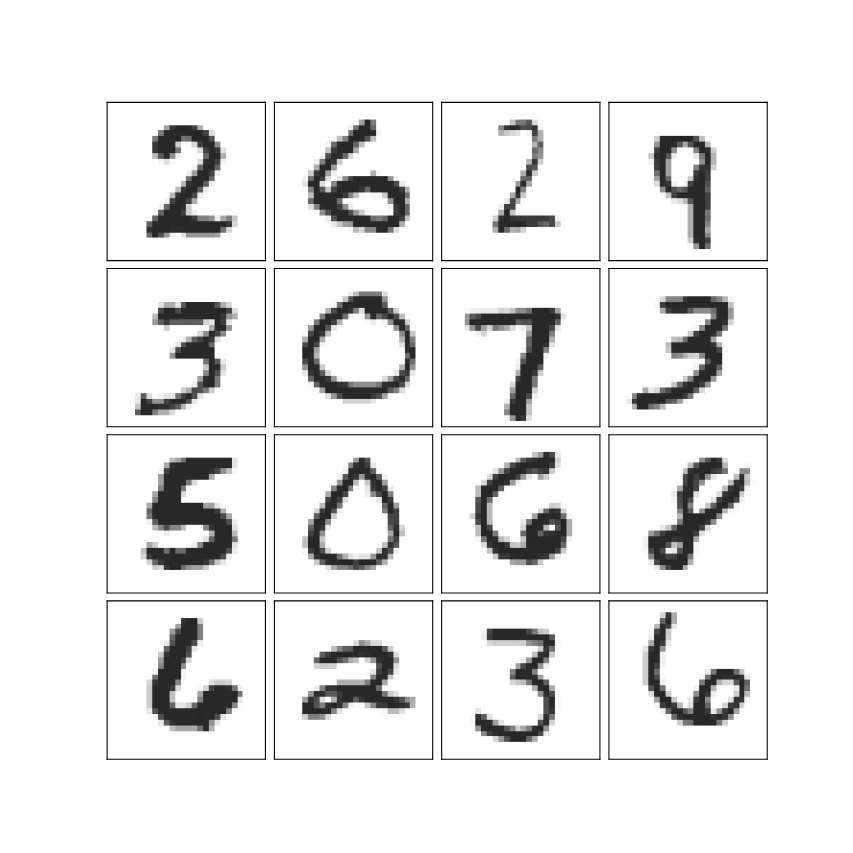

* Transform the input data to principal components using the `pipeline`.

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print(f"X_test has {X_test.shape[1]} features")
print(f"pc has {pc.shape[1]} features")



```
<script.py> output:
    X_test has 784 features
    pc has 78 features
```



* Inverse transform the components back to the original feature space.

* Plot the reconstructed data.

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)

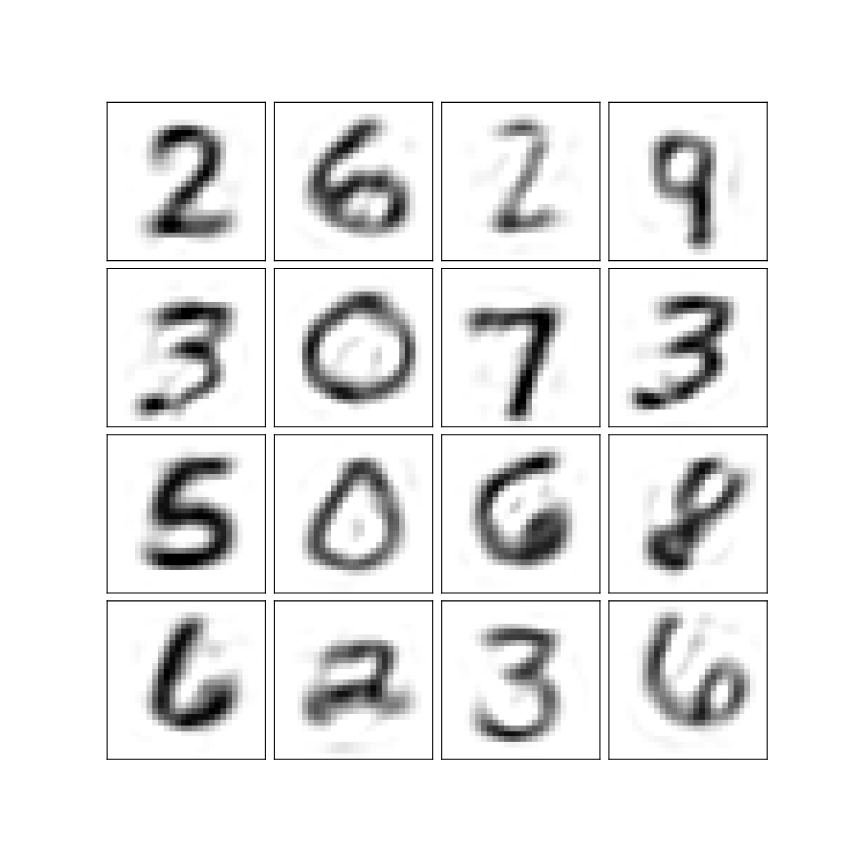

You've reduced the size of the data 10 fold but were able to reconstruct images with reasonable quality.